# Pymaceuticals Challenge
## In this study, we are looking at the effects of different drug treatments for cancer on mice. 
### The three drugs we will be looking at are Capomulin, Infubinol, and Ketapril. We will compare the tumor volume, metastatic sites, and survival rates for these different groups.
### The two files we have are clinicaltial_data.csv, which has columns mouse id, timepoint, tumor volume, and metastatic sites; and mouse_drug_data.csv, which describes which treatment the mice were assigned to and has columns mouse id and drug. We will use pandas to join these two tables so we can compare the effectiveness of each drug


## First Steps:
- Import dependencies, set file paths, and read data. We will merge two spreadsheets which contain the relevant data to be able to gather summary statistics

In [2]:
#import dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#set file paths
csv_path_trial = "Resources/clinicaltrial_data.csv"
csv_path_drug = "Resources/mouse_drug_data.csv"

#read data and put into dataframes
trial_data = pd.read_csv(csv_path_trial)
drug_data  = pd.read_csv(csv_path_drug)

#join data
total_trial_data = pd.merge(trial_data, drug_data, on = "Mouse ID")

### Next step: Create scatterplots for the different treatments based on different factors, such as tumor size, survival rates, and metastatic spread.

(33, 74)

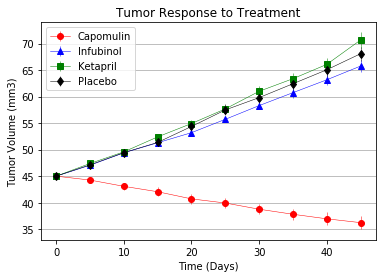

In [3]:
#date goes from 0 to 45
date_range = range(0, 45, 5)

#capomulin = total_trial_data[total_trial_data["Drug"] == "Capomulin"].groupby("Timepoint", as_index = False).mean()
cap = total_trial_data[total_trial_data["Drug"] == "Capomulin"].sem()

#create dataframes for each drug that group the data based on timepoint so that we can get the mean tumor data at each timepoint
#also create dataframes to gather the standard errors (ie, spread) of the groups so we can know how reliable the results are
capomulin = total_trial_data[total_trial_data["Drug"] == "Capomulin"].groupby("Timepoint", as_index = False).mean()
cap_e = total_trial_data[total_trial_data["Drug"] == "Capomulin"].groupby("Timepoint", as_index = True).sem()
infubinol = total_trial_data[total_trial_data["Drug"] == "Infubinol"].groupby("Timepoint", as_index = False).mean()
inf_e = total_trial_data[total_trial_data["Drug"] == "Infubinol"].groupby("Timepoint", as_index = True).sem()
ketapril = total_trial_data[total_trial_data["Drug"] == "Ketapril"].groupby("Timepoint", as_index = False).mean()
ket_e = total_trial_data[total_trial_data["Drug"] == "Ketapril"].groupby("Timepoint", as_index = True).sem()
placebo = total_trial_data[total_trial_data["Drug"] == "Placebo"].groupby("Timepoint", as_index = False).mean()
pla_e = total_trial_data[total_trial_data["Drug"] == "Placebo"].groupby("Timepoint", as_index = True).sem()

#scatter plot for tumor size
var = "Tumor Volume (mm3)"
plt.errorbar(capomulin["Timepoint"], capomulin[var], c = "Red", marker = "o", linewidth = 0.5,  yerr = cap_e[var])
plt.errorbar(infubinol["Timepoint"], infubinol[var], c = "Blue", marker = "^", linewidth = 0.5, yerr = inf_e[var])
plt.errorbar(ketapril["Timepoint"], ketapril[var], c = "Green", marker = "s", linewidth = 0.5, yerr = ket_e[var])
plt.errorbar(placebo["Timepoint"], placebo[var], c = "Black", marker = "d", linewidth = 0.5, yerr = pla_e[var])

#label axes on scatter plot
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

#give title to our scatter plot
plt.title("Tumor Response to Treatment")

#create legend
labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plt.legend(labels)

#create grid on y-axis to make plot more visually appealing
plt.grid(axis = 'y')

#set limits of y axis to make data easier to provide more spacing so it looks more visually appealing
plt.ylim(33, 74)

#### From the scatter plot above, we can see that the Capomulin drug markedly reduces tumor size. Standard errors bars show that the treatment results relative to the other treatments were not subject to variation and it's unlikely that the results were influenced by outlier mice. 

#### Infubinol and Ketapril do not appear to have a significant effect on tumor size relative to the placebo treatment. Their error bars overlap with the placebo error bars, indicating that the treatment differences could be simply due to chance

(-0.2, 3.8)

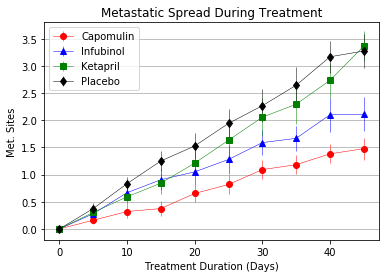

In [118]:
var = "Metastatic Sites"
plt.errorbar(capomulin["Timepoint"], capomulin[var], c = "Red", marker = "o", linewidth = 0.5,  yerr = cap_e[var])
plt.errorbar(infubinol["Timepoint"], infubinol[var], c = "Blue", marker = "^", linewidth = 0.5, yerr = inf_e[var])
plt.errorbar(ketapril["Timepoint"], ketapril[var], c = "Green", marker = "s", linewidth = 0.5, yerr = ket_e[var])
plt.errorbar(placebo["Timepoint"], placebo[var], c = "Black", marker = "d", linewidth = 0.5, yerr = pla_e[var])
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plt.legend(labels)
plt.grid(axis = 'y')
plt.ylim(-0.2, 3.8)

#### The scatterplot above shows that Capomulin and Infubinol both performed better as treatments than the placebo and ketapril treatments with preventing spreading of metastatic sites. Capomulin performed best, limiting the spread to just 1.5 metastatic sites on average; infubinol performed 2nd best, limiting the spread to about 2.1 metastatic sites

#### Ketapril performed no better than placebo


(33, 102)

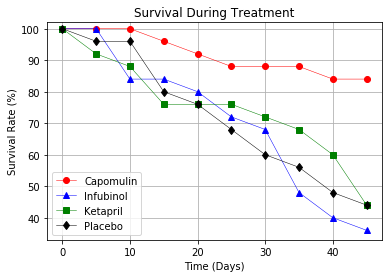

In [130]:
var = "Mouse ID"
capomulin_survival = total_trial_data[total_trial_data["Drug"] == "Capomulin"].groupby("Timepoint", as_index = True).count() / 25 * 100
infubinol_survival = total_trial_data[total_trial_data["Drug"] == "Infubinol"].groupby("Timepoint", as_index = True).count() / 25 * 100
ketapril_survival = total_trial_data[total_trial_data["Drug"] == "Ketapril"].groupby("Timepoint", as_index = True).count() / 25 * 100
placebo_survival = total_trial_data[total_trial_data["Drug"] == "Placebo"].groupby("Timepoint", as_index = True).count() / 25 * 100
date_range = np.arange(0, 50, 5)
plt.plot(date_range, capomulin_survival[var], c = "Red", marker = "o", linewidth = 0.5)
plt.plot(date_range, infubinol_survival[var], c = "Blue", marker = "^", linewidth = 0.5)
plt.plot(date_range, ketapril_survival[var], c = "Green", marker = "s", linewidth = 0.5)
plt.plot(date_range, placebo_survival[var], c = "Black", marker = "d", linewidth = 0.5)
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plt.legend(labels)
plt.grid()
plt.ylim(33, 102)

#### The scatterplot above compares the how likely different mice were to survive throughout the treatment period based on which treatment they were placed in. These results indicate that the best result came from Capomulin. The results also show that Infubinol, which did limit the metastatic sites spread, was nonetheless less effective than the other treatments at keeping mice alive.

#### Let's see how the tumor size compares to the start of the treatment with a bar graph. 

Text(2.35, 5, '51%')

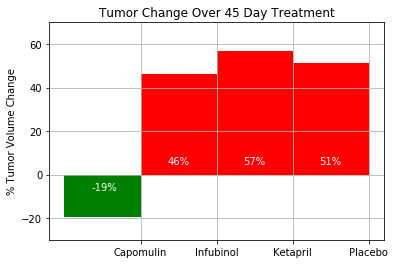

In [188]:
first_mean = total_trial_data[total_trial_data["Timepoint"] == 0]
first_cap_mean = first_mean[first_mean["Drug"] == "Capomulin"].mean()["Tumor Volume (mm3)"]
first_inf_mean = first_mean[first_mean["Drug"] == "Infubinol"].mean()["Tumor Volume (mm3)"]
first_ket_mean = first_mean[first_mean["Drug"] == "Ketapril"].mean()["Tumor Volume (mm3)"]
first_pla_mean = first_mean[first_mean["Drug"] == "Placebo"].mean()["Tumor Volume (mm3)"]
last_mean = total_trial_data[total_trial_data["Timepoint"] == 45]
last_cap_mean = last_mean[last_mean["Drug"] == "Capomulin"].mean()["Tumor Volume (mm3)"]
last_inf_mean = last_mean[last_mean["Drug"] == "Infubinol"].mean()["Tumor Volume (mm3)"]
last_ket_mean = last_mean[last_mean["Drug"] == "Ketapril"].mean()["Tumor Volume (mm3)"]
last_pla_mean = last_mean[last_mean["Drug"] == "Placebo"].mean()["Tumor Volume (mm3)"]
plt.bar("Capomulin", ( last_cap_mean - first_cap_mean ) / first_cap_mean * 100, color = "green", align = 'edge', width = -1)
plt.bar("Infubinol", ( last_inf_mean - first_cap_mean ) / first_inf_mean * 100, color = "red", align = 'edge', width = -1)
plt.bar("Ketapril", ( last_ket_mean - first_cap_mean ) / first_ket_mean * 100, color = "red", align = 'edge', width = -1)
plt.bar("Placebo", ( last_pla_mean - first_cap_mean ) / first_pla_mean * 100, color = "red", align = 'edge', width = -1)
plt.grid()
plt.ylim(-30,70)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.text(-0.64,-7, "-19%", c = "white")
plt.text(0.35, 5, "46%", c = "white")
plt.text(1.35, 5, "57%", c = "white")
plt.text(2.35, 5, "51%", c = "white")

#### Capomulin was best at reducing tumor volume, reducing the volume by 19%. The other treatments were less effective, with Infubinol allowing an increase of 46%, ketapril 57%, and placebo 51%. The entirety of each of these results suggests that capomulin is the most effective drug and that the other treatments are not effective.